In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import seaborn as sns

tf.enable_eager_execution()

In [2]:
df_train = pd.read_csv("train_ashrae.csv")

building = pd.read_csv("building_metadata.csv")
le = LabelEncoder()
building.primary_use = le.fit_transform(building.primary_use)

weather_train = pd.read_csv("weather_train.csv")

In [3]:
pd.read_csv("train_ashrae.csv")[200:205]

,building_id,meter,timestamp,meter_reading
200,173,1,2016-01-01 00:00:00,19.3427
201,174,0,2016-01-01 00:00:00,179.9000
202,174,1,2016-01-01 00:00:00,52.8583
203,175,0,2016-01-01 00:00:00,86.5900
204,175,1,2016-01-01 00:00:00,116.3370


In [4]:
meter_reading_true = pd.read_csv("meter_reading.csv")

In [5]:
meter_reading_true

,173.3703
0,53.5127
1,6.1430
2,101.7015
3,1141.2407
4,13.6512
...,...
12059973,184.5250
12059974,183.6000
12059975,178.4750
12059976,179.7250


In [6]:
df_train[:5]

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
building[:5]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,7432,2008.0,NaN
1,0,1,0,2720,2004.0,NaN
2,0,2,0,5376,1991.0,NaN
3,0,3,0,23685,2002.0,NaN
4,0,4,0,116607,1975.0,NaN


In [8]:
weather_train[:5]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [9]:
final_dataset = pd.read_csv("final.csv")

In [10]:
final_dataset

,Unnamed: 0,building_id,meter,meter_reading,timestamp,pred1,pred2,pred3,row_id,site_id,pred1_l1p,pred2_l1p,pred3_l1p,meter_reading_l1p
0,0,0,0.0,173.370300,2017-01-01 00:00:00,186.168100,92.729485,169.5334,0,0,5.232007,4.540413,5.138931,5.161181
1,1,1,0.0,53.512720,2017-01-01 00:00:00,85.102570,41.220722,89.6694,1,0,4.455539,3.742911,4.507220,3.998434
2,2,2,0.0,6.143042,2017-01-01 00:00:00,13.020659,2.686540,12.9043,2,0,2.640532,1.304688,2.632198,1.966139
3,3,3,0.0,101.701470,2017-01-01 00:00:00,249.669040,139.413600,312.1101,3,0,5.524134,4.944593,5.746555,4.631826
4,4,4,0.0,1141.240700,2017-01-01 00:00:00,1130.942400,620.063800,1359.5784,4,0,7.031690,6.431434,7.215665,7.040747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059974,12059974,1363,0.0,184.525000,2018-12-31 19:00:00,242.345700,243.688720,256.8769,41497410,15,5.494483,5.499987,5.552482,5.223190
12059975,12059975,1363,0.0,183.600000,2018-12-31 20:00:00,236.228440,232.681020,251.5137,41497660,15,5.469024,5.453957,5.531465,5.218191
12059976,12059976,1363,0.0,178.475000,2018-12-31 21:00:00,220.224350,230.061610,244.7984,41497910,15,5.399178,5.442684,5.504512,5.190036
12059977,12059977,1363,0.0,179.725000,2018-12-31 22:00:00,204.584660,206.055620,240.2654,41498160,15,5.325858,5.332987,5.485898,5.196977


In [11]:
new_dataset = final_dataset[['pred1','pred2','pred3', "pred1_l1p", "pred2_l1p", "pred3_l1p","meter_reading","meter_reading_l1p"]]


In [12]:
new_dataset

,pred1,pred2,pred3,pred1_l1p,pred2_l1p,pred3_l1p,meter_reading,meter_reading_l1p
0,186.168100,92.729485,169.5334,5.232007,4.540413,5.138931,173.370300,5.161181
1,85.102570,41.220722,89.6694,4.455539,3.742911,4.507220,53.512720,3.998434
2,13.020659,2.686540,12.9043,2.640532,1.304688,2.632198,6.143042,1.966139
3,249.669040,139.413600,312.1101,5.524134,4.944593,5.746555,101.701470,4.631826
4,1130.942400,620.063800,1359.5784,7.031690,6.431434,7.215665,1141.240700,7.040747
...,...,...,...,...,...,...,...,...
12059974,242.345700,243.688720,256.8769,5.494483,5.499987,5.552482,184.525000,5.223190
12059975,236.228440,232.681020,251.5137,5.469024,5.453957,5.531465,183.600000,5.218191
12059976,220.224350,230.061610,244.7984,5.399178,5.442684,5.504512,178.475000,5.190036
12059977,204.584660,206.055620,240.2654,5.325858,5.332987,5.485898,179.725000,5.196977


In [45]:
len(new_dataset)

12059979

In [46]:
import numpy as np

In [13]:
X_train = np.array([new_dataset['pred1'].values,new_dataset['pred2'].values, new_dataset['pred3'].values]).T
X_train = X_train.astype(np.float32)
y_train = new_dataset['meter_reading_l1p']

In [14]:
y_train

0           5.161181
1           3.998434
2           1.966139
3           4.631826
4           7.040747
              ...   
12059974    5.223190
12059975    5.218191
12059976    5.190036
12059977    5.196977
12059978    5.172329
Name: meter_reading_l1p, Length: 12059979, dtype: float64

In [19]:
loss_list = []

pred1 is predictions on training set

# w1 * pred 1 + w2* pred2 + w3*pred3


In [ ]:
weights1 * predictions1 + weights2 * predictions2 || y_label

# Predictions on TRAINING Set

In [20]:
# 
weights = tf.Variable([[0.3],[0.3],[0.3]])
steps = 1000

lr = 0.1

opt = optimizers.SGD(lr)

#Speed up the train step by precompiling
@tf.function()
def train_step(opt):
    with tf.GradientTape() as tape:
        y  = tf.matmul(X_train, weights)[:,0]
        loss = tf.reduce_mean((tf.math.log1p(y) - y_train) ** 2)
    grads = tape.gradient(loss, weights)
    opt.apply_gradients([(grads, weights)])
    
    return loss

prev_loss = 9999
for i in range(steps):
    loss = train_step(opt)
    loss_list.append(loss.numpy())
    if loss > prev_loss:
        lr /= 2
        opt.lr = lr
        
    prev_loss = loss
    print(f'step: {i} {loss.numpy()}')   
    

step: 0 0.9568193554878235
step: 1 0.9541218876838684
step: 2 0.953779935836792
step: 3 0.9537061452865601
step: 4 0.9536720514297485
step: 5 0.953644871711731
step: 6 0.9536195993423462
step: 7 0.9535948634147644
step: 8 0.9535709619522095
step: 9 0.9535475969314575
step: 10 0.9535249471664429
step: 11 0.9535028338432312
step: 12 0.9534812569618225
step: 13 0.9534602761268616
step: 14 0.9534398913383484
step: 15 0.9534199833869934
step: 16 0.9534006118774414
step: 17 0.9533816576004028
step: 18 0.9533633589744568
step: 19 0.9533453583717346
step: 20 0.953328013420105
step: 21 0.953311026096344
step: 22 0.9532945156097412
step: 23 0.9532784223556519
step: 24 0.9532626867294312
step: 25 0.9532474279403687
step: 26 0.9532325863838196
step: 27 0.9532181024551392
step: 28 0.9532039761543274
step: 29 0.9531903862953186
step: 30 0.9531769752502441
step: 31 0.9531639218330383
step: 32 0.9531512260437012
step: 33 0.9531388282775879
step: 34 0.953126847743988
step: 35 0.9531151652336121
step: 3

step: 288 0.9526711702346802
step: 289 0.9526711702346802
step: 290 0.9526710510253906
step: 291 0.9526710510253906
step: 292 0.9526709914207458
step: 293 0.9526709914207458
step: 294 0.9526709914207458
step: 295 0.9526708722114563
step: 296 0.9526708722114563
step: 297 0.9526708126068115
step: 298 0.9526708126068115
step: 299 0.9526708126068115
step: 300 0.9526707530021667
step: 301 0.9526707530021667
step: 302 0.9526707530021667
step: 303 0.9526706337928772
step: 304 0.9526705741882324
step: 305 0.9526706337928772
step: 306 0.9526705741882324
step: 307 0.9526705741882324
step: 308 0.9526705741882324
step: 309 0.9526705741882324
step: 310 0.9526704549789429
step: 311 0.9526704549789429
step: 312 0.9526704549789429
step: 313 0.9526704549789429
step: 314 0.9526704549789429
step: 315 0.9526704549789429
step: 316 0.9526703953742981
step: 317 0.9526704549789429
step: 318 0.9526703953742981
step: 319 0.9526703953742981
step: 320 0.9526703357696533
step: 321 0.9526703953742981
step: 322 0.95

step: 571 0.9526703953742981
step: 572 0.9526703953742981
step: 573 0.9526703953742981
step: 574 0.9526703953742981
step: 575 0.9526703953742981
step: 576 0.9526703953742981
step: 577 0.9526703953742981
step: 578 0.9526703953742981
step: 579 0.9526703953742981
step: 580 0.9526703953742981
step: 581 0.9526703953742981
step: 582 0.9526703953742981
step: 583 0.9526703953742981
step: 584 0.9526703953742981
step: 585 0.9526703953742981
step: 586 0.9526703953742981
step: 587 0.9526703953742981
step: 588 0.9526703953742981
step: 589 0.9526703953742981
step: 590 0.9526703953742981
step: 591 0.9526703953742981
step: 592 0.9526703953742981
step: 593 0.9526703953742981
step: 594 0.9526703953742981
step: 595 0.9526703953742981
step: 596 0.9526703953742981
step: 597 0.9526703953742981
step: 598 0.9526703953742981
step: 599 0.9526703953742981
step: 600 0.9526703953742981
step: 601 0.9526703953742981
step: 602 0.9526703953742981
step: 603 0.9526703953742981
step: 604 0.9526703953742981
step: 605 0.95

step: 855 0.9526703953742981
step: 856 0.9526703953742981
step: 857 0.9526703953742981
step: 858 0.9526703953742981
step: 859 0.9526703953742981
step: 860 0.9526703953742981
step: 861 0.9526703953742981
step: 862 0.9526703953742981
step: 863 0.9526703953742981
step: 864 0.9526703953742981
step: 865 0.9526703953742981
step: 866 0.9526703953742981
step: 867 0.9526703953742981
step: 868 0.9526703953742981
step: 869 0.9526703953742981
step: 870 0.9526703953742981
step: 871 0.9526703953742981
step: 872 0.9526703953742981
step: 873 0.9526703953742981
step: 874 0.9526703953742981
step: 875 0.9526703953742981
step: 876 0.9526703953742981
step: 877 0.9526703953742981
step: 878 0.9526703953742981
step: 879 0.9526703953742981
step: 880 0.9526703953742981
step: 881 0.9526703953742981
step: 882 0.9526703953742981
step: 883 0.9526703953742981
step: 884 0.9526703953742981
step: 885 0.9526703953742981
step: 886 0.9526703953742981
step: 887 0.9526703953742981
step: 888 0.9526703953742981
step: 889 0.95

In [25]:
predictions  = tf.math.log1p(tf.matmul(X_train, weights)[:,0])

In [26]:
(predictions).numpy().shape

(12059979,)

In [27]:
(final_dataset['meter_reading_l1p']).shape

(12059979,)

0.976048354918058

## Tensor Flow Model

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


score_sgb =  0.976048354918058


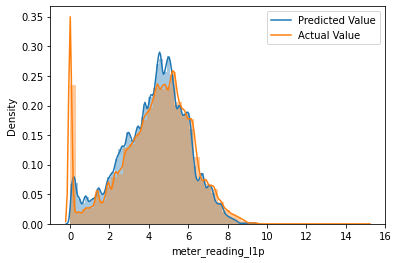

In [129]:
import seaborn as sns
import numpy as np
sns.distplot(predictions)
sns.distplot(final_dataset['meter_reading_l1p'])

plt.legend(labels=["Predicted Value", "Actual Value"])
leak_score = np.sqrt(mean_squared_error(predictions.numpy(), final_dataset['meter_reading_l1p']))
print ('score_sgb = ', leak_score)

In [23]:
print(weights.numpy().tolist())

[[0.37125954031944275], [0.2118888646364212], [0.36567923426628113]]


No handles with labels found to put in legend.


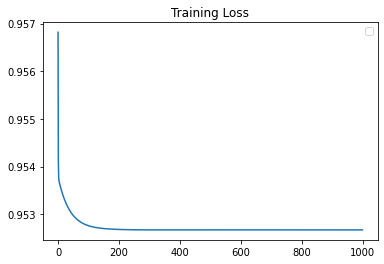

In [31]:
import matplotlib.pyplot as plt

epochs = 999

plt.plot([i for i in range(epochs+1)], loss_list)
# plt.plot(epochs, np.array(loss_list, dtype=object), 'bo', label='Training loss')

# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [21]:
np.sqrt(loss)

0.97604835

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


score1 =  0.9854709142880407


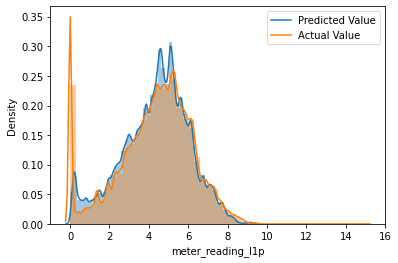

In [102]:
import seaborn as sns
import numpy as np
sns.distplot(final_dataset['pred1_l1p'])
sns.distplot(final_dataset['meter_reading_l1p'])

plt.legend(labels=["Predicted Value", "Actual Value"])
leak_score = np.sqrt(mean_squared_error(final_dataset['pred1_l1p'], final_dataset['meter_reading_l1p']))
print ('score1 = ', leak_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


score2 =  1.0053529922849456


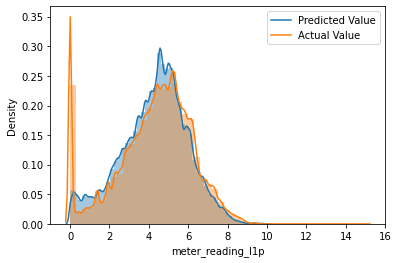

In [103]:
import seaborn as sns
import numpy as np
sns.distplot(final_dataset['pred2_l1p'])
sns.distplot(final_dataset['meter_reading_l1p'])

plt.legend(labels=["Predicted Value", "Actual Value"])
leak_score = np.sqrt(mean_squared_error(final_dataset['pred2_l1p'], final_dataset['meter_reading_l1p']))
print ('score2 = ', leak_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


score3 =  0.9965966624283398


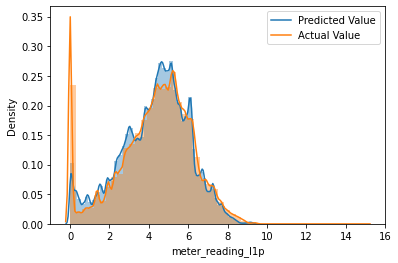

In [104]:
import seaborn as sns
import numpy as np
sns.distplot(final_dataset['pred3_l1p'])
sns.distplot(final_dataset['meter_reading_l1p'])

plt.legend(labels=["Predicted Value", "Actual Value"])
leak_score = np.sqrt(mean_squared_error(final_dataset['pred3_l1p'], final_dataset['meter_reading_l1p']))
print ('score3 = ', leak_score)

## MEDIAN

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median score= 0.9816145610002613


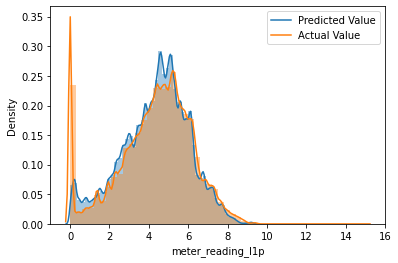

In [15]:
final_dataset['median_pred'] = np.median(final_dataset[['pred1', 'pred2', 'pred3']].values, axis=1)
final_dataset['median_pred_l1p'] = np.log1p(final_dataset.median_pred)
score = np.sqrt(mean_squared_error(final_dataset.median_pred_l1p, final_dataset.meter_reading_l1p))

sns.distplot(final_dataset.median_pred_l1p)#blue
sns.distplot(final_dataset.meter_reading_l1p)#Orange
plt.legend(labels=["Predicted Value", "Actual Value"])

print ('median score=', score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean score= 0.9776538717265053


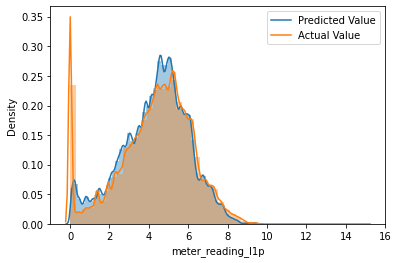

In [16]:
final_dataset['mean_pred'] = np.mean(final_dataset[['pred1', 'pred2', 'pred3']].values, axis=1)
final_dataset['mean_pred_l1p'] = np.log1p(final_dataset.mean_pred)
score = np.sqrt(mean_squared_error(final_dataset.mean_pred_l1p, final_dataset.meter_reading_l1p))

sns.distplot(final_dataset.mean_pred_l1p)
sns.distplot(final_dataset.meter_reading_l1p)
plt.legend(labels=["Predicted Value", "Actual Value"])

print ('mean score=' , score)